In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import warnings

warnings.filterwarnings("ignore")

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 20

In [2]:
# Unidades no S.I [Kg, N/m, (N*s)/m]:
# GDL não suspenso:
mu = 75
ku = 193000

# GDL suspenso:
ms = 375
ks = 35000
cs = 1800

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


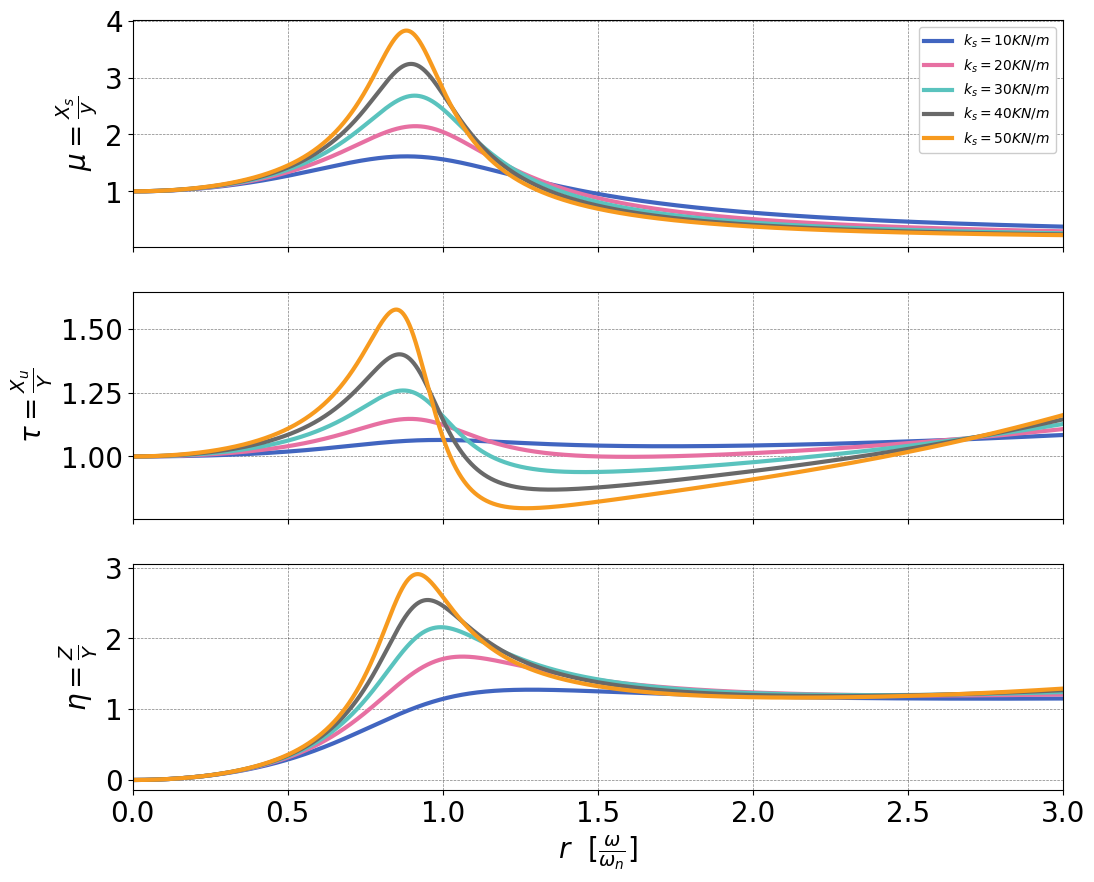

In [3]:
stiff = np.linspace(10, 50, 5)

plt.rcParams['figure.figsize'] = (12, 10)
fig, axs = plt.subplots(3, 1, sharex=True)
epsilon = (ms/mu)
wu = np.sqrt(ku/mu)
w = np.arange(0, (4*wu), 1e-2)
r = (w/wu)

for k in stiff:

    ws = np.sqrt((k*1e3)/ms)
    zeta = (cs/(2*ms*ws))
    alpha = (ws/wu)

    # axs[0] = mu: Xs/Y transmissibility suspended mass
    # axs[1] = tau: Xu/Y transmissibility unsuspended mass
    # axs[2] = eta: Z/Y displacement transmissibility

    Z1 = (r**2*(r**2*alpha**2-1)+(1-(1+epsilon)*r**2*alpha**2))
    Z2 = 2*zeta*r*(1-(1+epsilon)*r**2*alpha**2)

    mu  = np.sqrt( (4*zeta**2*r**2 + 1)/(Z1**2+Z2**2) )
    tau = np.sqrt( (4*zeta**2*r**2+1+r**2*(r**2-2))/(Z1**2+Z2**2) )
    eta = np.sqrt(r**4 / (Z1**2+Z2**2))

    axs[0].plot(r, mu, label=f'$k_s={k:.0f}KN/m$')
    axs[1].plot(r, tau, label=f'$k_s={k:.0f}KN/m$')
    axs[2].plot(r, eta, label=f'$k_s={k:.0f}KN/m$')

# put the Y label in diagonal to save space

axs[0].set_ylabel('$\mu = \\frac{X_s}{y}$')
axs[1].set_ylabel('$\\tau = \\frac{X_u}{Y}$')
axs[2].set_ylabel('$\eta = \\frac{Z}{Y}$')
axs[2].set_xlabel('$r ~~[\\frac{\omega}{\omega_n}]$')

plt.xlim(0, 3)
plt.subplot(3, 1, 1)
plt.legend(loc='upper right', fontsize=10)
plt.savefig('curves/transXk.eps', dpi=600, transparent=True, bbox_inches='tight')